# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/full-x4/PROVISORIO2021-11-03_17-49-11"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,03/11/2021_17:49:13,422,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.00,25.50,25.37,45.38,25.56,Prendido
1,03/11/2021_17:49:19,422,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.94,25.50,25.37,45.38,25.56,Prendido
2,03/11/2021_17:49:25,422,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.94,25.50,25.31,45.56,25.50,Prendido
3,03/11/2021_17:49:31,421,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.94,25.50,25.37,45.69,25.56,Prendido
4,03/11/2021_17:49:37,421,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,25.94,25.50,25.37,45.88,25.56,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,03/11/2021_17:58:30,452,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.31,25.94,26.44,43.56,25.75,Prendido
96,03/11/2021_17:58:36,451,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.37,25.94,26.44,43.38,25.81,Prendido
97,03/11/2021_17:58:42,451,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.37,25.94,26.50,43.13,25.81,Prendido
98,03/11/2021_17:58:48,452,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.44,26.00,26.50,42.81,25.81,Prendido


In [5]:
df0['CO2']

0     422
1     422
2     422
3     421
4     421
     ... 
95    452
96    451
97    451
98    452
99    454
Name: CO2, Length: 100, dtype: int64

In [6]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

03/11/2021_17:49:13


In [7]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

245


In [8]:
# Llenemos las listas con los datos
for i in range(n-1):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [9]:
#co2[np.where(co2=='!Warning: Clearing Byte: 154')[0][0]]=-1
#co2[np.where(co2=='!Warning: Clearing Byte: 49')[0][0]]=-1
#co2[np.where(co2=='!Warning: Clearing Byte: 49')[0][0]]=-1

In [10]:
#Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos

tiempo_de_medicion=30 #en minutos

lim=tiempos[np.where(np.diff(estado_valvula_co2_1)==1)] #encuentro el primer momento de la danza
danza=[] #les agrego los demás
for i in range(len(lim)):
    danza.append(lim[i])
    danza.append(lim[i]+tiempo_de_medicion*60)
    danza.append(lim[i]+tiempo_de_medicion*60*2)
    danza.append(lim[i]+tiempo_de_medicion*60*3)
    danza.append(lim[i]+tiempo_de_medicion*60*4)

In [11]:
danza

[14399.0,
 16199.0,
 17999.0,
 19799.0,
 21599.0,
 36004.0,
 37804.0,
 39604.0,
 41404.0,
 43204.0,
 57610.0,
 59410.0,
 61210.0,
 63010.0,
 64810.0,
 79210.0,
 81010.0,
 82810.0,
 84610.0,
 86410.0,
 100820.0,
 102620.0,
 104420.0,
 106220.0,
 108020.0,
 122419.0,
 124219.0,
 126019.0,
 127819.0,
 129619.0]

# Gráficos

<IPython.core.display.Javascript object>


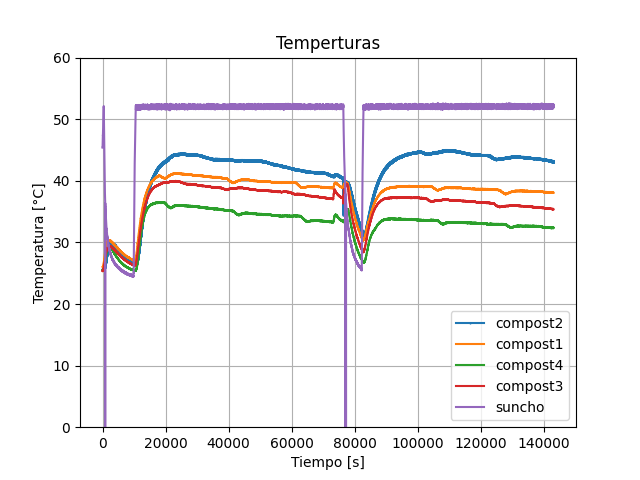

In [12]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho,'.-',markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1,'-',markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2,'-',markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3,'-',markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4,'-',markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,60)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

<IPython.core.display.Javascript object>


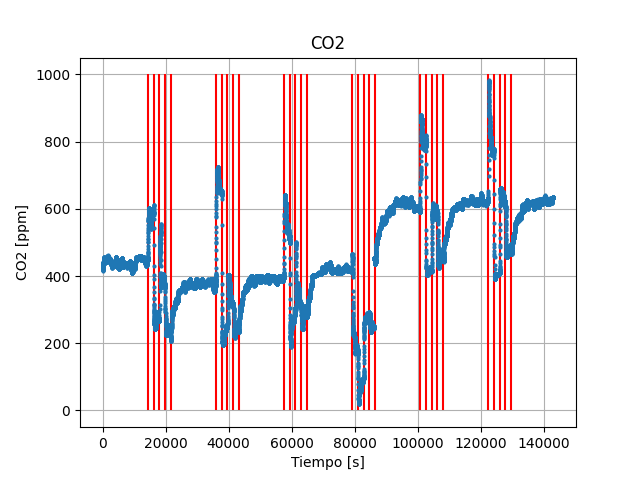

In [13]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=1000,color='r')
plt.grid()
#plt.ylim(-50,600)
#plt.xlim(20400,25000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2.png")
plt.show()

In [14]:
np.where(co2=='!Warning: Clearing Byte: 49')

<ipython-input-14-5cf3614ab437>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np.where(co2=='!Warning: Clearing Byte: 49')


(array([], dtype=int64),)